In [1]:
#pip install tensorflow numpy

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l1
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

In [4]:
base_dir = r'C:\Users\firoj\OneDrive\Desktop\thesis_test\Thesis_test_01\Feature_matrix\AIS_Weather\\'
os.chdir(base_dir)

In [5]:
# Load the datasets
X_train = np.load(base_dir + 'X_train.npy')
X_val = np.load(base_dir + 'X_val.npy')
X_test = np.load(base_dir + 'X_test.npy')

y_train = np.load(base_dir + 'y_train.npy')
y_val = np.load(base_dir + 'y_val.npy')
y_test = np.load(base_dir + 'y_test.npy')

In [6]:
# Reshape X_train to be 3D [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

print("New shape of X_train:", X_train.shape)

New shape of X_train: (34654, 1, 10)


In [7]:
# Define RMSE as a custom metric
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [8]:
input_shape = (X_train.shape[1], X_train.shape[2]) # timesteps, features

# Model architecture with L1 Regularization
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(input_shape), kernel_regularizer=l1(0.01)), # Adjust your input_shape
    Dropout(0.2),
    LSTM(50, kernel_regularizer=l1(0.01)),
    Dropout(0.2),
    Dense(1)
])

In [9]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.006793806619350815), 
              loss='mean_squared_error', 
              metrics=['mse', rmse, 'mae', 'mape'])

In [10]:
#Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 50)             12200     
                                                                 
 dropout (Dropout)           (None, 1, 50)             0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 32451 (126.76 KB)
Trainable params: 32451 (126.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# Fit the model
history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_data=(X_val, y_val), 
                    callbacks=[early_stopping])

Epoch 1/100
1083/1083 [==============================] - 6s 3ms/step - loss: 240012.1094 - mse: 239973.6719 - rmse: 479.0186 - mae: 274.6557 - mape: 2038742016.0000 - val_loss: 185647.8125 - val_mse: 185597.9531 - val_rmse: 420.3051 - val_mae: 240.9214 - val_mape: 2591658240.0000
Epoch 2/100
1083/1083 [==============================] - 3s 3ms/step - loss: 157371.1406 - mse: 157315.2188 - rmse: 387.3909 - mae: 221.1603 - mape: 2099131392.0000 - val_loss: 129400.2188 - val_mse: 129338.6641 - val_rmse: 350.6042 - val_mae: 201.9562 - val_mape: 2056899456.0000
Epoch 3/100
1083/1083 [==============================] - 3s 3ms/step - loss: 117295.5625 - mse: 117229.5859 - rmse: 334.1213 - mae: 195.6244 - mape: 1974532864.0000 - val_loss: 100905.6250 - val_mse: 100835.9219 - val_rmse: 309.8809 - val_mae: 182.1658 - val_mape: 1945982976.0000
Epoch 4/100
1083/1083 [==============================] - 3s 3ms/step - loss: 97229.6875 - mse: 97156.5859 - rmse: 305.2814 - mae: 180.4416 - mape: 1894284800

1083/1083 [==============================] - 3s 3ms/step - loss: 39528.4023 - mse: 39391.9453 - rmse: 191.3300 - mae: 113.3091 - mape: 1812770304.0000 - val_loss: 28718.4805 - val_mse: 28581.4141 - val_rmse: 161.4478 - val_mae: 93.6364 - val_mape: 1959602688.0000
Epoch 31/100
1083/1083 [==============================] - 3s 3ms/step - loss: 40051.7422 - mse: 39914.0000 - rmse: 192.7960 - mae: 114.0614 - mape: 1883245312.0000 - val_loss: 30601.7324 - val_mse: 30463.3457 - val_rmse: 166.8906 - val_mae: 96.3735 - val_mape: 1851471488.0000
Epoch 32/100
1083/1083 [==============================] - 3s 3ms/step - loss: 39570.9883 - mse: 39431.9414 - rmse: 191.7154 - mae: 113.3829 - mape: 1858071936.0000 - val_loss: 29312.9492 - val_mse: 29173.2480 - val_rmse: 163.0811 - val_mae: 94.4237 - val_mape: 2028484096.0000
Epoch 33/100
1083/1083 [==============================] - 3s 3ms/step - loss: 38875.3164 - mse: 38734.9180 - rmse: 189.9955 - mae: 112.3463 - mape: 1887977984.0000 - val_loss: 29492.

In [13]:
test_loss = model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)

233/233 [==============================] - 0s 2ms/step - loss: 31078.4004 - mse: 30941.3027 - rmse: 168.7989 - mae: 95.7940 - mape: 1839083520.0000
Test Loss: [31078.400390625, 30941.302734375, 168.7988739013672, 95.79396057128906, 1839083520.0]


### Loss Curve

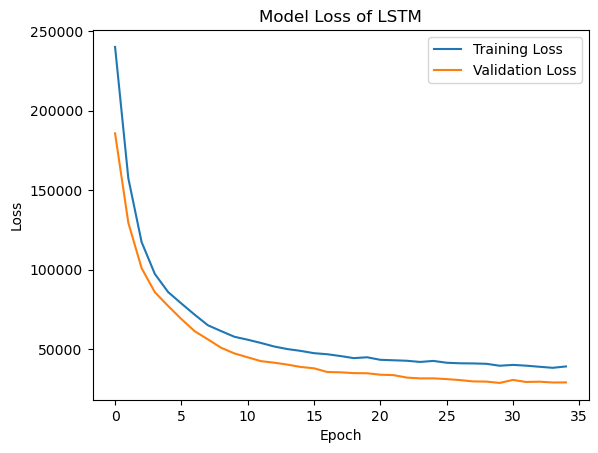

In [14]:
# Assuming history is the output of the model.fit() method
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss of LSTM')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [15]:
y_pred = model.predict(X_test).flatten()  # Flatten predictions to ensure it's a 1D array
y_test_flattened = y_test.flatten()  # Flatten actual values for consistency

233/233 [==============================] - 1s 1ms/step


### Actual vs Predicted Values

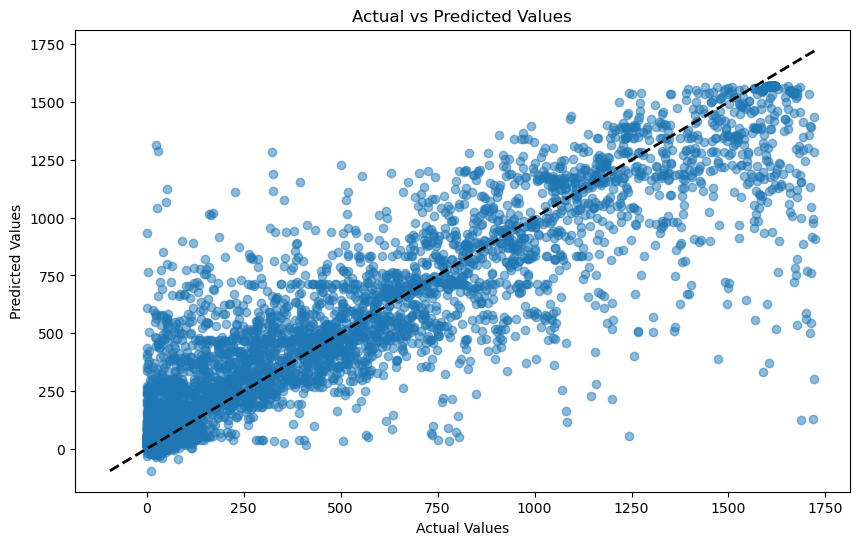

In [16]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_flattened, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Plot a line of perfect predictions for reference
max_val = max(y_test_flattened.max(), y_pred.max())
min_val = min(y_test_flattened.min(), y_pred.min())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)  # Black dashed line for perfect predictions

plt.show()

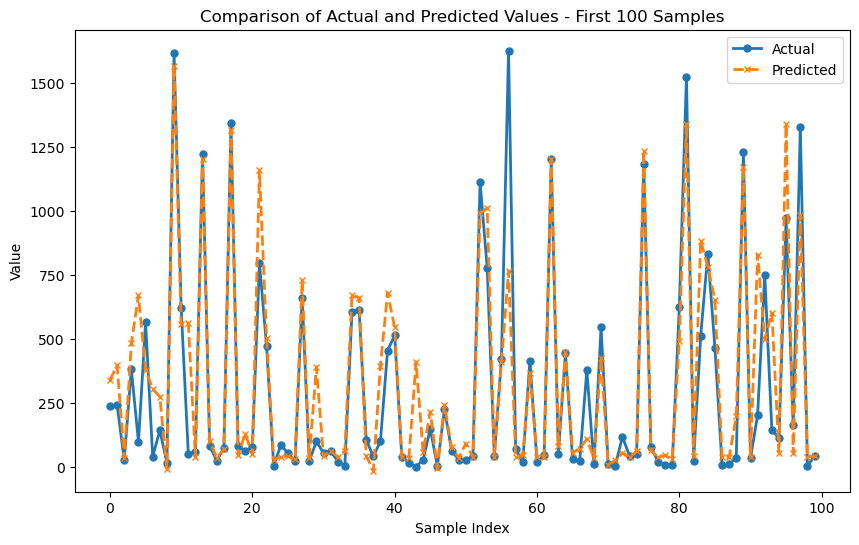

In [17]:
# Plotting a line plot for a clearer comparison for a subset
plt.figure(figsize=(10, 6))
plt.plot(y_test_flattened[:100], marker='o', label='Actual', linewidth=2, markersize=5)
plt.plot(y_pred[:100], marker='x', linestyle='--', label='Predicted', linewidth=2, markersize=5)
plt.title('Comparison of Actual and Predicted Values - First 100 Samples')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()

### Error Distribution

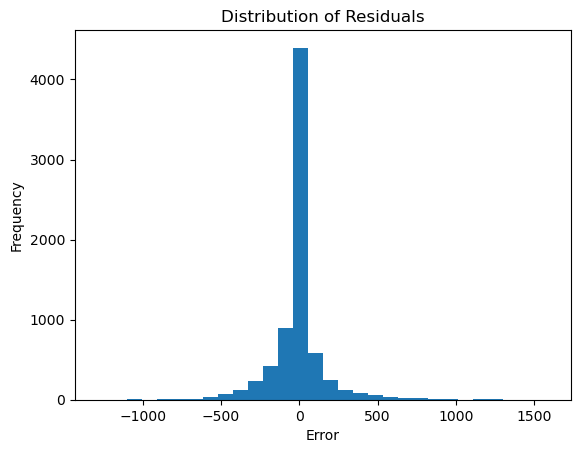

In [18]:
# Calculating residuals
residuals = y_test - y_pred.squeeze()  # Adjust dimensions if necessary

# Plotting the histogram of residuals
plt.hist(residuals, bins=30)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

In [19]:
# Evaluate the model
loss, mse, rmse, mae, mape = model.evaluate(X_test, y_test)
print("Test loss (MSE):", loss)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)

233/233 [==============================] - 0s 2ms/step - loss: 31078.4004 - mse: 30941.3027 - rmse: 168.7989 - mae: 95.7940 - mape: 1839083520.0000
Test loss (MSE): 31078.400390625
Mean Squared Error (MSE): 30941.302734375
Root Mean Squared Error (RMSE): 168.7988739013672
Mean Absolute Error (MAE): 95.79396057128906
Mean Absolute Percentage Error (MAPE): 1839083520.0


# Hyperparameter Tuning

In [20]:
#pip install keras_tuner

In [21]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from tensorflow.keras.optimizers import Adam

In [22]:
def build_model(hp):
    model = Sequential()
    model.add(Bidirectional(
        LSTM(
            units=hp.Int('units', min_value=30, max_value=100, step=10), 
            activation='relu'), 
        input_shape=input_shape))
    model.add(Dense(1))
    
    # Hyperparameters for the optimizer
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')

    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='mean_squared_error',
        metrics=['mse', 'mae', 'mape']
    )

    return model

In [23]:
# Set up the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_mse',  # Change to 'val_loss' if you want to minimize loss
    max_trials=10,        # Number of variations to try
    executions_per_trial=3, # Number of models to train for each trial
    directory='my_dir',    # Directory where the results are saved
    project_name='bidirectional_lstm'
)

Reloading Tuner from my_dir\bidirectional_lstm\tuner0.json


In [24]:
# Start search
tuner.search(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

In [25]:
# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best LSTM Units: {best_hps.get('units')}")
print(f"Best Learning Rate: {best_hps.get('learning_rate')}")

Best LSTM Units: 50
Best Learning Rate: 0.009401332935236331


In [26]:
tuner.results_summary()

Results summary
Results in my_dir\bidirectional_lstm
Showing 10 best trials
Objective(name="val_mse", direction="min")

Trial 07 summary
Hyperparameters:
units: 50
learning_rate: 0.009401332935236331
Score: 129329.27864583333

Trial 09 summary
Hyperparameters:
units: 100
learning_rate: 0.003638673446214659
Score: 151821.81770833334

Trial 02 summary
Hyperparameters:
units: 30
learning_rate: 0.004800925318640427
Score: 155399.30729166666

Trial 05 summary
Hyperparameters:
units: 80
learning_rate: 0.0026048714310172158
Score: 168455.31770833334

Trial 06 summary
Hyperparameters:
units: 30
learning_rate: 0.0020953695537578336
Score: 188570.65625

Trial 00 summary
Hyperparameters:
units: 40
learning_rate: 0.0009210825271212746
Score: 219600.08854166666

Trial 08 summary
Hyperparameters:
units: 40
learning_rate: 0.0008418115733884539
Score: 223133.140625

Trial 04 summary
Hyperparameters:
units: 70
learning_rate: 0.000300744853699717
Score: 254435.421875

Trial 01 summary
Hyperparameters:
u

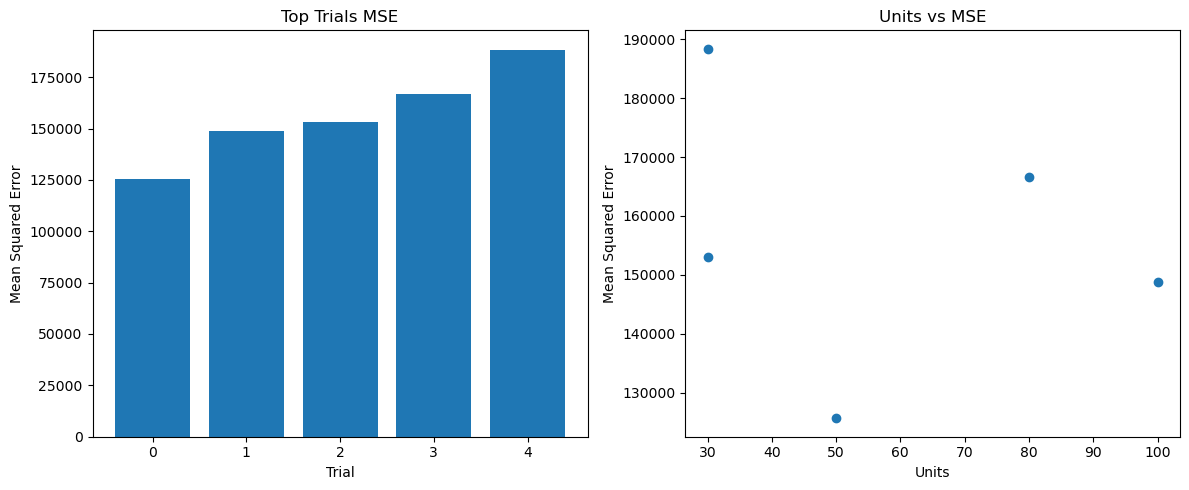

In [27]:
# Get all completed trials as a DataFrame
results_df = tuner.oracle.get_best_trials(num_trials=5)

# Initialize the plot
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plotting MSE for the top trials
ax[0].set_title('Top Trials MSE')
ax[0].set_ylabel('Mean Squared Error')
ax[0].set_xlabel('Trial')
ax[0].bar(range(len(results_df)), [trial.metrics.get_best_value('mse') for trial in results_df])

# Plotting hyperparameters (e.g., units) vs MSE
ax[1].set_title('Units vs MSE')
ax[1].set_ylabel('Mean Squared Error')
ax[1].set_xlabel('Units')
ax[1].scatter([trial.hyperparameters.values['units'] for trial in results_df], 
              [trial.metrics.get_best_value('mse') for trial in results_df])

plt.tight_layout()
plt.show()